In [10]:
import pandas as pd

#pd.set_option('max_columns',None)
#pd.set_option('max_rows',None)

import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [11]:
from matplotlib import style
%matplotlib inline

## Import the three datasets

In [12]:
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'],encoding='latin-1')

ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['userid' , 'movieid' , 'rating' , 'timestamp'],encoding='latin-1')

users = pd.read_csv('users.dat' , delimiter = '::' , names = ['userid' , 'gender' , 'age' ,'occupation' ,'zip_code'],encoding='latin-1')

In [ ]:
#Users Data

In [13]:
users.head()

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [95]:
users.isnull().sum()

userid        0
gender        0
age           0
occupation    0
zip_code      0
dtype: int64

In [14]:
users.shape

(6040, 5)

In [ ]:
#Movies Data

In [15]:
movies.head()

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
movies.isnull().sum()

movieid    0
title      0
genres     0
dtype: int64

In [17]:
movies.shape

(3883, 3)

In [19]:
#ratings Data

In [18]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
ratings.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [21]:
ratings.shape

(1000209, 4)

### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.
### (Hint: (i) Merge two tables at a time.
### (ii) Merge the tables using two primary keys MovieID & UserId

In [22]:
df1=pd.merge(users.drop('zip_code', axis=1), ratings.drop('timestamp',axis=1), on='userid')

master_data = pd.merge(df1, movies,   on='movieid')

In [23]:
master_data.head()

,userid,gender,age,occupation,movieid,rating,title,genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

In [ ]:
#Data Visualization

### 1. User Age Distribution

In [25]:
age_count = users['age'].value_counts()
age_count

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [26]:
age_Category = ('Under 18','18-24','25-34','35-44','45-49','50-55','56+')
x_position = np.arange(len(age_Category))
x_position

array([0, 1, 2, 3, 4, 5, 6])

In [27]:
age_Values =[age_count[1],age_count[18],age_count[25],age_count[35],age_count[45],age_count[50],age_count[56]]
age_Values

[222, 1103, 2096, 1193, 550, 496, 380]

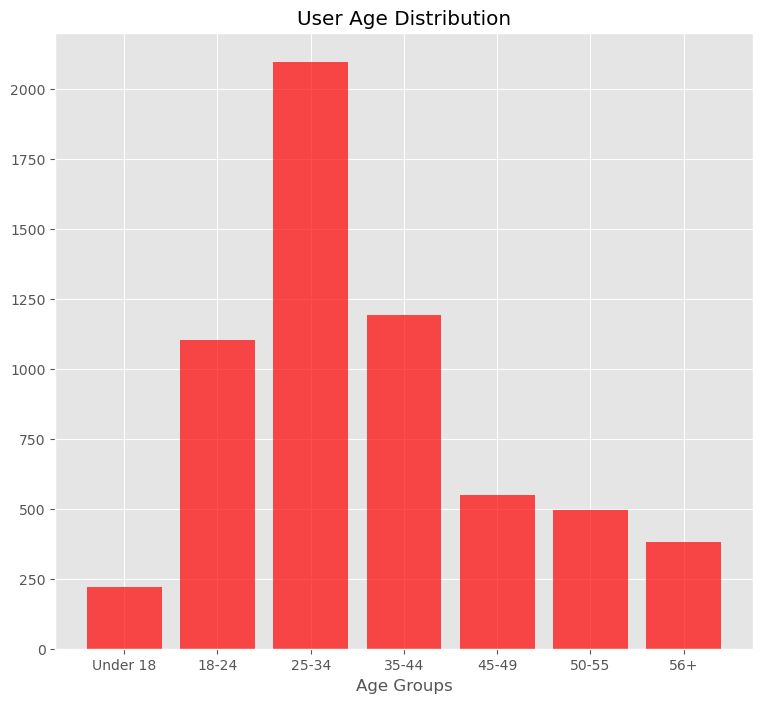

In [30]:
#plotting bar chart
style.use('ggplot')
plt.figure(figsize=(9,8))
plt.bar(x_position,age_Values,align='center',color='r',alpha=0.7)
#set the y axis lable
plt.xlabel('Age Groups')
#set the bar value
plt.xticks(x_position,age_Category)
#set the title
plt.title('User Age Distribution')
plt.show()

In [ ]:
# The above age distribution shows that most of people are from age group 25-34

### 2. User ratings of movie Toy Story

In [31]:
movies.movieid[movies.title=='Toy Story (1995)']

0    1
Name: movieid, dtype: int64

In [32]:
toystory_data = ratings[ratings.movieid==1]
toystory_data.head(10)

,userid,movieid,rating,timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [33]:
movies_ratings_toystory = toystory_data.groupby('rating').size()
movies_ratings_toystory

rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [34]:
ratings_type = ('1','2','3','4','5')
x_pos = np.arange(len(ratings_type))
x_pos

array([0, 1, 2, 3, 4])

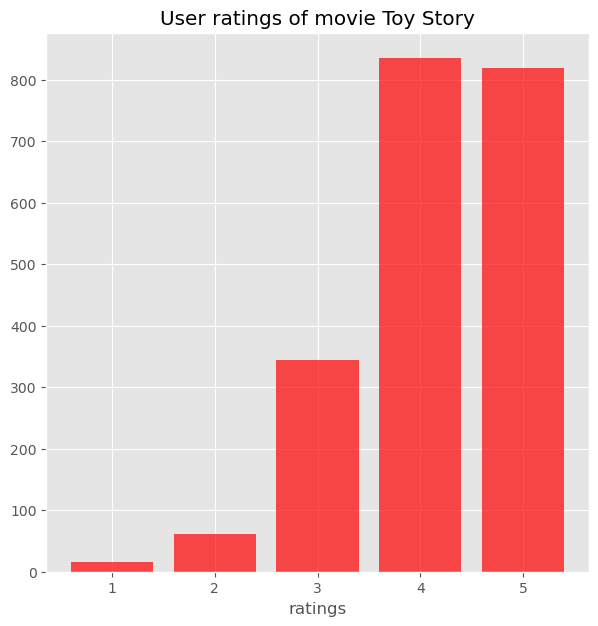

In [35]:
#plotting bar chart
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.bar(x_pos,movies_ratings_toystory,align='center',color='r',alpha=0.7)
#set the y axis lable
plt.xlabel('ratings')
#set the bar value
plt.xticks(x_pos,ratings_type)
#set the title
plt.title('User ratings of movie Toy Story')
plt.show()

In [ ]:
# The above group shows that the movie Toy story has ratings more than 4

### 3.Top 25 movies by viewership rating

In [37]:
movies_rating = master_data.groupby(['title'], as_index=False)
average_movies_ratings = movies_rating.agg({'rating':'mean'})
average_movies_ratings.head(25)

,title,rating
0,"$1,000,000 Duck (1971)",3.027027
1,'Night Mother (1986),3.371429
2,'Til There Was You (1997),2.692308
3,"'burbs, The (1989)",2.910891
4,...And Justice for All (1979),3.713568
5,1-900 (1994),2.500000
6,10 Things I Hate About You (1999),3.422857
7,101 Dalmatians (1961),3.596460
8,101 Dalmatians (1996),3.046703
9,12 Angry Men (1957),4.295455


In [38]:
top_25_movies = average_movies_ratings.sort_values('rating', ascending=False).head(25)
top_25_movies

,title,rating
3477,Ulysses (Ulisse) (1954),5.000000
2025,Lured (1947),5.000000
1203,Follow the Bitch (1998),5.000000
407,Bittersweet Motel (2000),5.000000
3087,Song of Freedom (1936),5.000000
2453,One Little Indian (1973),5.000000
3044,Smashing Time (1967),5.000000
2903,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1297,"Gate of Heavenly Peace, The (1995)",5.000000
249,"Baby, The (1973)",5.000000


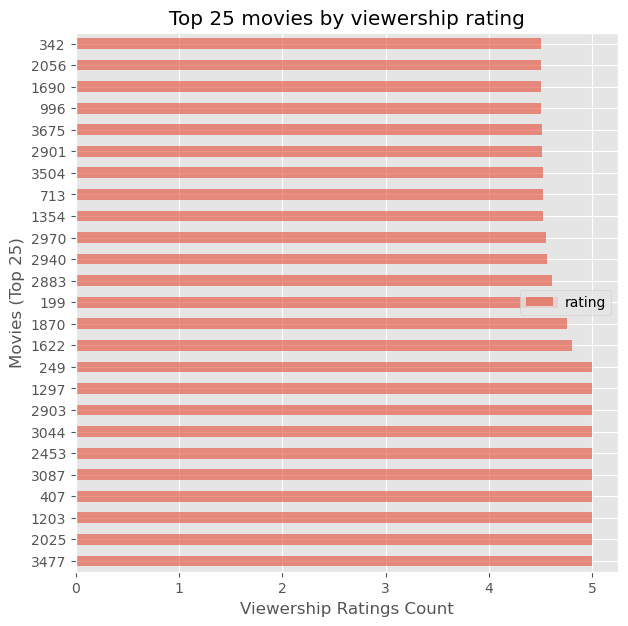

In [39]:
top_25_movies.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

### 4. Ratings for all the movies reviewed by for a particular user of user id = 2696

In [40]:
users_rating_data = master_data[master_data['userid']==2496]
users_rating_data = users_rating_data[['userid','movieid','title','rating']]
users_rating_data.head(10)

,userid,movieid,title,rating
668,2496,1193,One Flew Over the Cuckoo's Nest (1975),5
2518,2496,914,My Fair Lady (1964),4
8506,2496,1287,Ben-Hur (1959),5
9492,2496,2804,"Christmas Story, A (1983)",4
14173,2496,2398,Miracle on 34th Street (1947),5
16319,2496,1035,"Sound of Music, The (1965)",5
17581,2496,2791,Airplane! (1980),3
19798,2496,3105,Awakenings (1990),3
24263,2496,1270,Back to the Future (1985),2
26818,2496,527,Schindler's List (1993),5


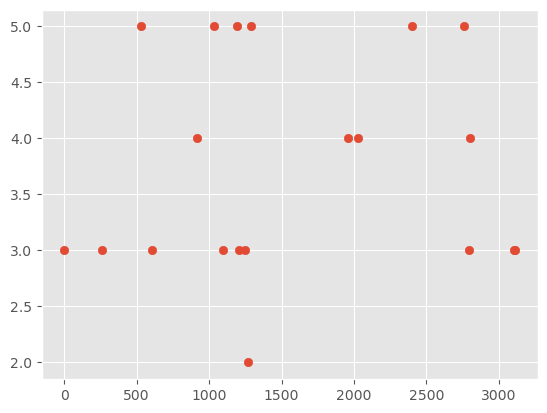

In [41]:
# plotting the above data
plt.scatter(x=users_rating_data['movieid'].head(20),y=users_rating_data['rating'].head(20))
plt.show()

### Feature Engineering:
##### Use column genres:
#### 1. Find out all the unique genres

In [42]:
genres = master_data['genres'].str.split("|")
genres

0                           [Drama]
1                           [Drama]
2                           [Drama]
3                           [Drama]
4                           [Drama]
                     ...           
1000204               [Documentary]
1000205                     [Drama]
1000206                     [Drama]
1000207    [Comedy, Drama, Western]
1000208               [Documentary]
Name: genres, Length: 1000209, dtype: object

In [43]:
unique_genres = set()
for gen in genres:
    unique_genres = unique_genres.union(set(gen))

In [44]:
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

#### 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [46]:
onehotgenre = master_data["genres"].str.get_dummies("|")
onehotgenre.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [47]:
onehotgenre = pd.concat([master_data,onehotgenre],axis=1)
onehotgenre.head()

,userid,gender,age,occupation,movieid,rating,title,genres,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
onehotgenre.columns

Index(['userid', 'gender', 'age', 'occupation', 'movieid', 'rating', 'title',
       'genres', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

#### 3. Determine the features affecting the ratings of any particular movie

In [49]:
features_data =master_data.copy()
features_data

,userid,gender,age,occupation,movieid,rating,title,genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,5,Modulations (1998),Documentary
1000205,5675,M,35,14,2703,3,Broken Vessels (1998),Drama
1000206,5780,M,18,17,2845,1,White Boys (1999),Drama
1000207,5851,F,18,20,3607,5,One Little Indian (1973),Comedy|Drama|Western


In [50]:
#Fetching the year which the movie was released
features_data[["title","year"]] = features_data.title.str.extract("(.)\s\((.\d+)",expand=True)
features_data = features_data.drop(['title'],axis=1)
features_data

,userid,gender,age,occupation,movieid,rating,genres,year
0,1,F,1,10,1193,5,Drama,1975
1,2,M,56,16,1193,5,Drama,1975
2,12,M,25,12,1193,4,Drama,1975
3,15,M,25,7,1193,4,Drama,1975
4,17,M,50,1,1193,5,Drama,1975
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,5,Documentary,1998
1000205,5675,M,35,14,2703,3,Drama,1998
1000206,5780,M,18,17,2845,1,Drama,1999
1000207,5851,F,18,20,3607,5,Comedy|Drama|Western,1973


In [51]:
#Calculating the age of movies
features_data['year'] = features_data.year.astype(int)
features_data['movie_age'] = 2000 -features_data['year']
features_data

,userid,gender,age,occupation,movieid,rating,genres,year,movie_age
0,1,F,1,10,1193,5,Drama,1975,25
1,2,M,56,16,1193,5,Drama,1975,25
2,12,M,25,12,1193,4,Drama,1975,25
3,15,M,25,7,1193,4,Drama,1975,25
4,17,M,50,1,1193,5,Drama,1975,25
...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,5,Documentary,1998,2
1000205,5675,M,35,14,2703,3,Drama,1998,2
1000206,5780,M,18,17,2845,1,Drama,1999,1
1000207,5851,F,18,20,3607,5,Comedy|Drama|Western,1973,27


In [52]:
#Creating Gender variable as integer type
features_data['gender'] = features_data.gender.replace('F',1)
features_data['gender'] = features_data.gender.replace('M',0)
features_data['gender'] = features_data.gender.astype(int)
features_data.head()

,userid,gender,age,occupation,movieid,rating,genres,year,movie_age
0,1,1,1,10,1193,5,Drama,1975,25
1,2,0,56,16,1193,5,Drama,1975,25
2,12,0,25,12,1193,4,Drama,1975,25
3,15,0,25,7,1193,4,Drama,1975,25
4,17,0,50,1,1193,5,Drama,1975,25


In [53]:
#Checking the correlation of features with Rating
features_data[['gender','occupation', 'age', 'movie_age']].corrwith(features_data['rating'])

gender        0.019861
occupation    0.006753
age           0.056869
movie_age     0.156946
dtype: float64

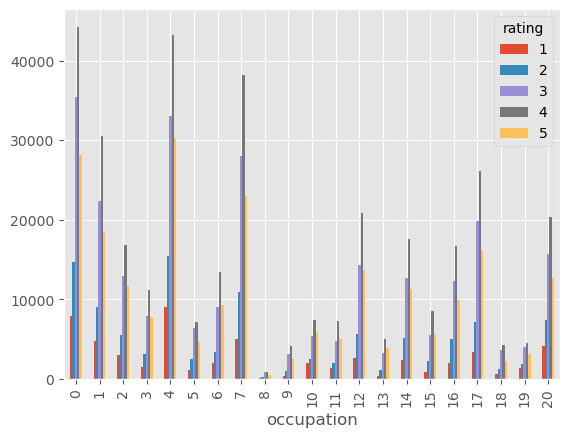

In [54]:
#Occupation relationship with Rating
features_data.groupby(["occupation","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

In [56]:
#Gender relationship with Rating
#1 -> Male, 0 -> Female

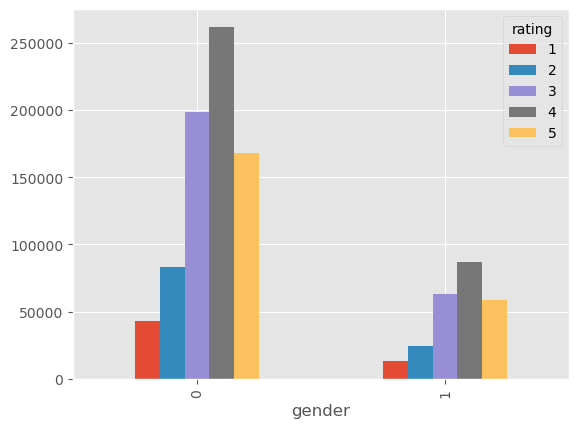

In [57]:
features_data.groupby(["gender","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

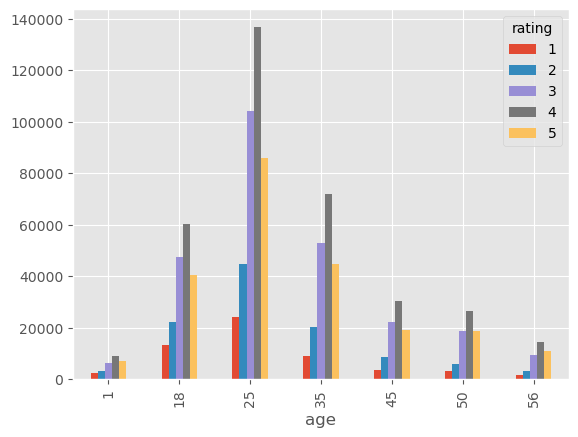

In [58]:
#Age relationship with Rating
features_data.groupby(["age","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

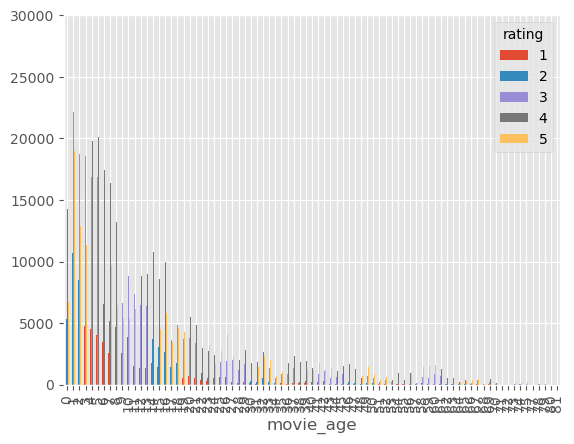

In [59]:
#Movie_Age relationship with Rating
features_data.groupby(["movie_age","rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

#### 4. Develop an appropriate model to predict the movie rating

In [60]:
#To Predict the values of rating we are using Logistic regression

In [61]:
# Assign independent variables to X dataset
X = master_data[['age','occupation','movieid']].head(500)
X

,age,occupation,movieid
0,1,10,1193
1,56,16,1193
2,25,12,1193
3,25,7,1193
4,50,1,1193
...,...,...,...
495,25,2,1193
496,18,4,1193
497,25,12,1193
498,18,4,1193


In [62]:
# Assign dependent variables to Y dataset
Y = master_data['rating'].head(500)
Y

0      5
1      5
2      4
3      4
4      5
      ..
495    4
496    5
497    5
498    5
499    5
Name: rating, Length: 500, dtype: int64

In [63]:
# view the shape for both axes
print (X.shape)
print (Y.shape)

(500, 3)
(500,)


In [64]:
# Splitting the data into training & testing datasets(70:30)
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,random_state=2,test_size=0.3)

In [65]:
# use the Logistic regression estimator
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [67]:
# fit data into the Logistic regression estimator
logReg.fit(X_train,Y_train)

LogisticRegression()

In [68]:
y_predict=logReg.predict(X_test)

In [69]:
y_predict

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [70]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,Y_test)

0.5866666666666667

In [71]:
#Check model performance on new dataset
# create Example object with new values for prediction
X_new = [[25,7,1193],[18,17,2198]]

In [72]:
logReg.predict(X_new)

array([5, 5], dtype=int64)

In [73]:
from sklearn import metrics
print (metrics.confusion_matrix(Y_test, y_predict))
print (metrics.classification_report(Y_test, y_predict))

[[ 0  0  0  0  1]
 [ 0  0  0  0  2]
 [ 0  0  0  0  9]
 [ 0  0  0  0 50]
 [ 0  0  0  0 88]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        50
           5       0.59      1.00      0.74        88

    accuracy                           0.59       150
   macro avg       0.12      0.20      0.15       150
weighted avg       0.34      0.59      0.43       150

